In [ ]:
import pickle
import IPython
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [ ]:
!wget https://kaityo256.github.io/python_zero/recursion/maze.pickle

--2020-07-02 16:34:49--  https://kaityo256.github.io/python_zero/recursion/maze.pickle
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1959 (1.9K) [application/octet-stream]
Saving to: ‘maze.pickle.1’

maze.pickle.1       100%[===================>]   1.91K  --.-KB/s    in 0s      

2020-07-02 16:34:49 (34.1 MB/s) - ‘maze.pickle.1’ saved [1959/1959]



In [ ]:
def save_image(maze, filename = 'test.png'):
  w = len(maze)
  h = len(maze[0])
  g = int(400/w)
  white = (255, 255, 255)
  im = Image.new('RGB', (w*g, h*g), white)
  draw = ImageDraw.Draw(im)
  for ix in range(w):
    for iy in range(h):
      x = ix*g
      y = iy*g 
      s = maze[ix][iy]
      color = white
      if s == '*':
        color = (0, 0, 0)
      elif s == 'S':
        color = (0, 0, 255)
      elif s == 'G':
        color = (0, 255, 0)
      elif s == '+':
        color = (255, 0, 0)
      if isinstance(maze[ix][iy], int):
        color = (128, 128, 128)
      draw.rectangle((x, y, x+g, y+g), fill=color)
  im.save(filename)
  plt.imshow(Image.open(filename))

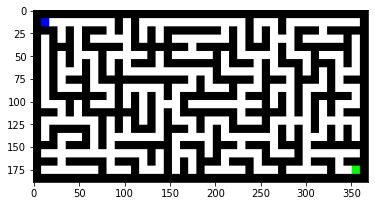

In [ ]:
with open('maze.pickle', 'rb') as f:
  maze = pickle.load(f)
save_image(maze)

In [ ]:
def solve(x, y, step, maze):
  if maze[x][y] == '*':
    return
  if isinstance(maze[x][y], int):
    return
  maze[x][y] = step
  solve(x+1, y, step+1, maze)
  solve(x-1, y, step+1, maze)
  solve(x, y+1, step+1, maze)
  solve(x, y-1, step+1, maze)

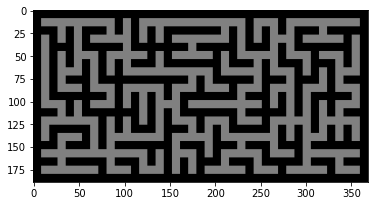

In [ ]:
solve(1, 1, 0, maze)
save_image(maze)

In [ ]:
def draw_path(x, y, count, maze):
  if not isinstance(maze[x][y], int):
    return
  if maze[x][y] != count:
    return
  maze[x][y] = '+'
  count -= 1
  draw_path(x+1, y, count, maze)
  draw_path(x-1, y, count, maze)
  draw_path(x, y+1, count, maze)
  draw_path(x, y-1, count, maze)

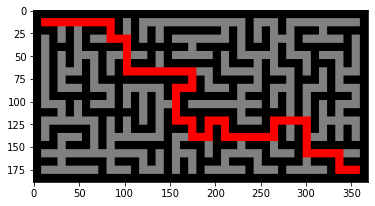

In [ ]:
draw_path(39, 19, maze[39][19], maze)
save_image(maze)

In [ ]:
!pip install apng
from apng import APNG

In [ ]:
def solve_anime(x, y, step, maze, files):
  if maze[x][y] == '*':
    return
  if isinstance(maze[x][y], int):
    return
  maze[x][y] = step
  index = len(files)
  filename ='file%0.3d.png' % index
  save_image(maze, filename)
  files.append(filename)
  solve_anime(x+1, y, step+1, maze, files)
  solve_anime(x-1, y, step+1, maze, files)
  solve_anime(x, y+1, step+1, maze, files)
  solve_anime(x, y-1, step+1, maze, files)

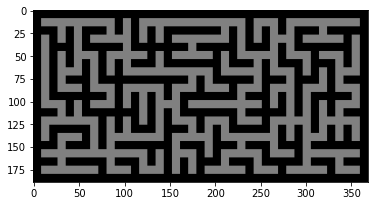

In [ ]:
with open('maze.pickle', 'rb') as f:
  maze = pickle.load(f)
files = []
solve_anime(1, 1, 0, maze, files)

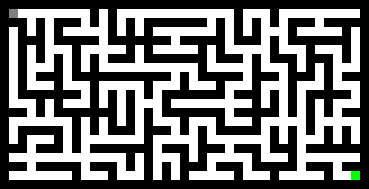

In [ ]:
APNG.from_files(files, delay=50).save('animation.png')
IPython.display.Image('animation.png')